In [1]:
!pip install category_encoders
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=40456dbf60e9240f00d16fe5899ea11d23afe1838a3e10402ed2216919848675
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


#**1. Business Problem Understanding**

##**1.1 Context**

Shopaku merupakan sebuah perusahaan yang mempunyai platform e-commerce di mana anda bisa berbelanja berbagai merek yang sudah anda kenal, sekaligus menemukan toko dan penjual  perusahaan secara online terutama untuk produk gadget yaitu laptop dan mobile phone. Dalam dunia e-commerce, keloyalan pelanggan adalah kunci keberhasilan jangka panjang. Salah satu tantangan utama yang dihadapi oleh perusahaan e-commerce adalah churn pelanggan, yaitu pelanggan yang berhenti menggunakan aplikasi dalam periode tertentu. Memahami dan mengelola churn pelanggan sangat penting salah satunya untuk mengoptimalkan strategi pemasaran.

Dengan menganalisis data churn, perusahaan e-commerce dapat mengidentifikasi faktor-faktor yang berkontribusi terhadap churn dan mengembangkan strategi untuk meningkatkan retensi pelanggan. Misalnya, perusahaan dapat menawarkan promosi atau insentif kepada pelanggan dengan skor kepuasan rendah atau mengoptimalkan proses pengiriman untuk mengurangi waktu pengiriman bagi pelanggan yang tinggal jauh dari gudang. Analisis churn membantu dalam mengarahkan upaya pemasaran yang lebih efektif dan meningkatkan pengalaman pelanggan secara keseluruhan.


*Target*

0 : Tidak Churn

1 : Churn


##**1.2 Probelm Statement**

Saat perusahaan berusaha untuk membuat seseorang menjadi pelanggan di perusahaan tersebut, perusahaan pasti sudah mengeluarkan banyak strategi, tenaga, dan waktu untuk mendapatkannya. Hal ini tentu akan sangat disayangkan jika pelanggan tersebut lepas begitu saja.

Oleh sebab itu, sangat penting bagi perusahaan untuk memastikan growth rate perusahaan terus meningkat dan menjaga agar churn rate dapat menurun. Salah satu langkah yang dapat diambil untuk menjaga churn rate dapat menurun adalah dengan memprediksi target pelanggan yang tepat agar dapat disesuaikan metode yang akan diambil guna mencegah churn.


##**1.3 Goals :**

Berdasarkan permasalahan tersebut, perusahaan ingin dapat memprediksi peluang pelanggan  yang akan churn atau tidak, sehingga dapat melakukan tindakan pencegahan yang diperlukan. Karena jika perusahaan berfokus pada semua pelanggan, biaya yang dikeluarkan tentu tikdaklah murah. Dan jika perusahaan ingin fokus untuk mendapatkan pelanggan baru tentu akan sulit dan memakan biaya iklan yang lebih mahal.

Dan juga, perusahaan ingin mengetahui apa faktor yang membuat pelanggan churn dan tidak, sehingga dapat memberikan insentif atau promosi khusus untuk mempertahankan pelanggan yang memiliki kecenderungan akan berhenti dan me-maintaince pelanggan yang masih akan tetap tidak churn.

##**1.4 Analytic Approach**

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang churn dan tidak. Kemudian akan dilanjutkan dengan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan churn atau tidak.

##**1.5 Metric Evaluation**

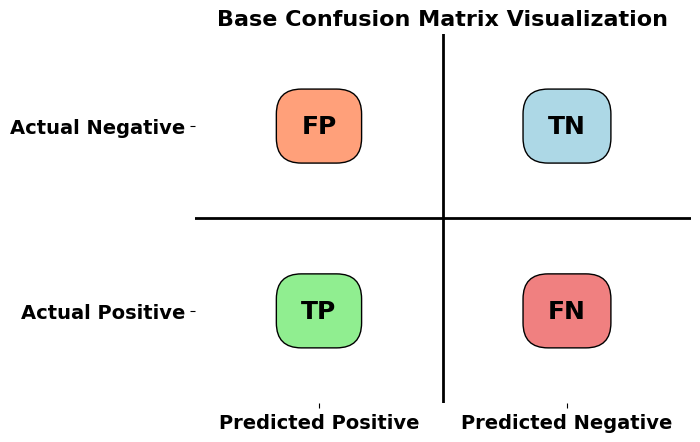

Gambar diatas merupakan confusion matrix yang merupakan cross tabulasi antara nilai prediksi dengan nilai aktual. Secara umum kelas terbagi menjadi dua kelas yaitu kelas positif dan kelas negatif atau bisa juga 0 dan 1.

TP adalah singkatan dari True Positif yaitu banyaknya prediksi kelas positif yang memang benar positif. TN adalah True Negatif yaitu banyaknya prediksi kelas negatif yang benar-benar negatif. Keduanya merupakan jenis hasil prediksi yang sesuai dengan kenyataan.
FP merupakan singkatan dari False Positif yang berarti banyaknya prediksi kelas positif yang sebenarnya masuk ke dalam kelas negatif. Sedangkan FN adalah False Negatif, banyaknya prediksi kelas negatif yang pada kenyataanya masuk ke dalam kelas positif. Keduanya mengindikasikan hasil prediksi yang ternyata salah. FN dikenal juga dengan istilah type I error sedangkan FP dikenal dengan istilah type II error

Pada data yang telah kami dapatkan maka confusion matrux dapat diinterpretasikan sebagai beriku.

**Target**

0 (Negative): No Churn

1 (Positive): Churn

**Interpretasi**
- True Positive (TP) : Prediksi Pelanggan Churn padahal Aktualnya Churn
- True Negative (TN) : Prediksi Pelanggan No Churn padahal Aktualnya No Churn
- False Positive (FP) : Prediksi Pelanggan Churn padahal Aktualnya No Churn
- False Negative (FN) : Prediksi Pelanggan No Churn padahal Aktualnya Churn

Berdasarkan interpretasi diatas, diketahui ada 2 Error yang akan terjadi, yang dapat merugikan perusahaan
- Type 1 error : False Positive, prediksi pelanggan Churn padahal aktualnya No Churn

    Konsekuensi: Melakukan upaya pencegahan Churn yang tidak perlu, seperti memberikan insentif atau promosi khusus untuk mempertahankan pelanggan yang sebenarnya tidak churn.

- Type 2 error : False Negative, prediksi pelanggan No Churn padahal aktualnya Churn

    Konsekuensi: Perusahaan mungkin kehilangan pelanggan tanpa melakukan tindakan pencegahan yang diperlukan.

Berikut adalah confusion matrix dari Ecommerce Churn yang telah dijabarjkan

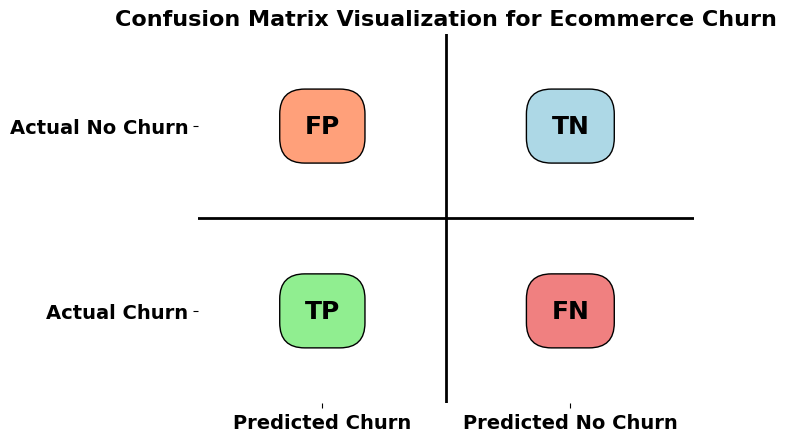

Pada analisis ini akan dititikberatkan pada perhitungan **recall** karena kami menganggap bahwa False Positif lebih baik daripada False Negatif. Yang artinya kami lebih memilih mentreatment orang-orang yang diprediksi churn padahal tidak churn daripada membiarkan orang-orang yang diprediksi tidak churn padahal aktualnya churn.

#**2. Data Understanding**



Data yang kami dapatkan bersumber dari kaggle [disini](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)

Dataset ini menyajikan informasi yang dapat digunakan untuk menganalisis perilaku churn pelanggan dan mengidentifikasi faktor-faktor yang mempengaruhi keputusan mereka untuk berhenti berlangganan. Berikut adalah ringkasan informasi dalam dataset ini:

1. Informasi Demografi Pelanggan (Dependents): Data ini memberikan wawasan tentang pribadi pelanggan, yang mungkin dapat memengaruhi kestabilan keanggotaan mereka dalam layanan. Misal pada feature `Warehouse To Home` dan `Marital Status`
2. Penggunaa Aplikasi Oleh Pelanggan: Dataset mencakup informasi tentang bagaimana pelanggan dalam menggunakan aplikasi tersebut, seperti: `Tenure`,`Number of Device Registered`, `Prefer Order Cat`, `Number Of Address`, `Day Since Last Order`, dan `Cashbak Amount` .
3. Kepuasan Pelanggan: Data ini meliputi penilaian pelanggan `Satisfaction Score` dan adanya komplain dari pelanggan `Complain`.
4. Status Churn Pelanggan: Terakhir, kolom yang kritis dalam dataset adalah kolom `Churn`, yang menunjukkan apakah seorang pelanggan telah berhenti dari aplikasi. Analisis terhadap kolom ini akan membantu dalam memahami pola churn pelanggan dan mengidentifikasi faktor-faktor yang berkaitan dengan keputusan mereka untuk meninggalkan layanan.

Dengan menggunakan dataset ini, akan dilakukan analisis yang cermat untuk mengidentifikasi pola-pola yang terkait dengan churn pelanggan. Hal ini akan membantu dalam mengembangkan strategi retensi yang lebih efektif dan meminimalkan kehilangan pelanggan yang bernilai bagi perusahaan.

## 2.1 Atribut Information

| Feature | Data Type | Description |
| --- | --- | --- |
| Tenure | Float | Lama pelanggan dalam menggunakan aplikasi (month) |
| WarehouseToHome | Float | Jarak gudang ke rumah pelanggan (mil) |
| NumberOfDeviceRegistered | Int | Jumlah total perangkat pelanggan yang terdaftar |
| PreferedOrderCat | Text | Kategori pesanan pelanggan di bulan terakhir |
| SatisfactionScore | Int | Skor Kepuasan Pelanggan terhadap pelayanan |
| MaritalStatus | Text | Status pernikahan seorang pelanggan |
| NumberOfAddress | Int | Jumlah total alamat pelanggan yang terdaftar |
| Complaint | Int | Apakah ada keluhan dalam bulan terakhir (1) ADA dan (0) TIDAK ADA |
| DaySinceLastOrder | Int | Hari pesanan terakhir pelanggan |
| CashbackAmount | Float | Rata-rata cashback dalam bulan terakhir |
| Churn | Int | Apakah pelanggan meninggalkan aplikasi (1) CHURN dan (0) TIDAK CHURN |

In [2]:
# --- Data Manipulation ---
import pandas as pd
import numpy as np

# --- Data Visualization ----
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# --- Exploration Data ---
from scipy.stats import mannwhitneyu, kstest, chi2_contingency

# --- Data Preprocesssing ----
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

# --- Pipeline ---
from imblearn.pipeline import Pipeline as imb_pipeline

# --- Imbalance Preprocessing ----
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

# --- Model Selection ---
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- Model ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# --- Model Evaluation ---
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import make_scorer, fbeta_score

# --- Model Saving ---
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/My Drive/Modul 3/Capstone Modul 3

/content/drive/My Drive/Modul 3/Capstone Modul 3


In [5]:
#Load Dataset

df = pd.read_csv("data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Berikut merupakan metrix bisnis yang dipakai pada analis ini, yaitu kami melihat metrix `Churn Rate` dan `Retention Rate` dengan periode waktu 2 tahun atau 24 bulan. Periode waktu ini kami pilih karena rata-rata orang mengganti ponsel setelah 2 tahun [disini](https://qontak.com/blog/customer-satisfaction-score/). Kepuasan pelanggan juga kami lihat berdasarkan `Satisfaction Score` yang diberikan dan `Komplain` yang diterima perusahaan selama pelanggan menggunakan ecommerce ini.

In [6]:
# Mencari bisnis metriks churn rate

churn_rate = ((df[df['Churn']==1]['Churn'].count()) / (df[df['Tenure'] <= 24]['Churn'].count()))*100
churn_rate

19.45727482678984

In [7]:
# Mencari bisnis metriks retention rate

rtt_rate = ((df[df['Churn']==0]['Churn'].count()) / (df[df['Tenure'] <= 24]['Churn'].count()))*100
rtt_rate

94.31293302540415

*Insight*

Churn rate yang kami peroleh dengan periode dua tahun adalah sebesar 19.45% dan retention rate yang kami peroleh dengan periode yang sama adalah sebesar 94.31%. Angka ini cukup aman jika dengan batasan metric churn rate adalah 20%-25% dan retention rate adlaah 70%-90%. Namun sangat wajar apabila ekspektasi stake holder adalah menginginkan churn rate 0% dan retention rate sebesar 100%.

In [8]:
# Mencari rata-rata skor

skor = df['SatisfactionScore'].sum() / df['SatisfactionScore'].count()
skor

3.0883024613042376

In [9]:
# Mencari presentase pelanggan yang pernah komplain

komplain = ((df[df['Complain']==1]['Complain'].sum()) / (df['Complain'].count()))*100
komplain

28.24156305506217

*Insight*

Rata-rata yang diperoleh dari `Satisfaction Score` adalah sebesar 3.08 dengan range 1 - 5, dimana nilai 1 menggambarkan pelanggan yang sangat tidak puas dan nilai 5 menggambarkan pelanggan sangat puas. Maka dapat dikatakan rata-rata kepuasan pelanggan pada aplikasi ini **Biasa Saja**, tidak terlalu puas dan juga tidak terlalu kecewa.

`Komplain` yang didapat dari total keseluruhan data pelanggan yang teranalisis adalah sebesar 28.24%. Yang berarti terdapat 28 dari 100 orang pernah melakukan komplain terhadap aplikasi ini. Jika kepuasan pelanggan ditinjau dari pernah atau tidaknya seorang pelanggan melakukan komplain maka angka yang diperoleh sebesar keseluruhan pelanggan dikurangi peresentase pelanggan yang melakukan komplain atau 100% - 28.24% yaitu 71.76%. Dapat disimpulkan 72 dari 100 orang bisa dikatakan puas jika seseorang tidak pernah melakukan komplain dijadikan acuan kepuasan pelanggan. Dengan 71,76% angka ini merupakan angka yang sudah keluar dari batas aman jika melihat dari American Satisfaction Index untuk kepuasan pelanggan umumya berkisar 75% sampai 80% [disini](https://qontak.com/blog/customer-satisfaction-score/). Namun angka ini masih berdasarkan asumsi dikarenakan belum ada ketentuan pelanggan yang tidak melakukan komplain dikatakan pelanggan yang puas.


Berikut kami akan lakukan analisa dengan machine learning untuk mendapatkan faktor-faktor terbesar yang mempengaruhi pelanggan untuk Churn atau tidak serta pelanggan mana yang akan melakukan churn sehingga bisa kita lakukan perlakuan pencegahan agar seorang pelanggan tidak jadi churn.

#**3. Data Cleaning & Exploratory**

In [10]:
# Melihat jumlah baris dan kolom data

df.shape

(3941, 11)

In [11]:
# Melihat type data dan missing value pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [12]:
# Fungsi mengecek karakteristik data

def checkData(x):
    return pd.DataFrame(
        {
        'feature': x.columns.values,
        'data_type': x.dtypes.values,
        'total_row': x.isna().count().values,
        'total_null': x.isna().sum().values,
        '%null_value': x.isna().mean().values * 100,
        'n_unique': x.nunique().values,
        'sample_unique': [x[col].unique() for col in x.columns]
        }
    )

In [13]:
# Memanggil fungsi

checkData(df)

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,Tenure,float64,3941,194,4.922608,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,3941,169,4.288252,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,3941,0,0.000000,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,3941,0,0.000000,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,3941,0,0.000000,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3941,0,0.000000,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,3941,0,0.000000,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,3941,0,0.000000,2,"[0, 1]"
8,DaySinceLastOrder,float64,3941,213,5.404720,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,3941,0,0.000000,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


**Insight :**
- Dataset yang kami gunakan terdiri dari `3941` baris dan `11` kolom dimana 10 kolom akan digunakan sebagai fitur dan kolom untuk target yakni `Churn`
- Terdapat missing value pada kolom `Tenure`, `Warehouse To Home`, dan `Day Since Last Order`.
-  Terdapat 2 kolom, data bertipe kategorik yaitu `Prefered Order Cat` dan `Marital Status` kolom-kolom ini akan dilakukan Encoding.
- Pada data bertipe numerik `Tenure`, `Warehouse To Home`, `Number Device of Registered`, `Number of Address`, `Day Since Last Order`, dan `Cashback Amount` akan dilakukan scaling.

Pada penjelasan diatas, tidak ada kolom yang akan kita drop karna melihat kemungkinan setiap data dapat berguna dalam pembuatan model machine learning nantinya.

In [14]:
# Melihat unik pada kolom 'Prefered Cat'

df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

Data yang ada pada kolom `Prefered Order Cat` terdapat 6 nilai unik, terdapat kategori yang harusnya sama namun memiliki penamaan berbeda yaitu **Mobile Phone** dan **Mobile**, data ini akan kami jadikan satu dengan penamaan **Mobile Phone**

In [15]:
# Mengganti data `Mobile` menjadi `Mobile Phone`
df.replace(to_replace="Mobile",
           value="Mobile Phone", inplace=True)

Kemudian kami cek data duplikat, pada pengerjaan machine learning data duplikat ini langsung kami drop.

In [16]:
# Melihat total baris duplikat

total_duplicated_row = df.duplicated().sum()
msg = f"Terdapat baris duplikat sebanyak {total_duplicated_row} baris" if total_duplicated_row else "Tidak ada baris duplikat"

print(msg)

Terdapat baris duplikat sebanyak 672 baris


In [17]:
# Menghapus baris duplikat

df.drop_duplicates(inplace=True)

<ipython-input-18-af3547a0b9ab>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-af3547a0b9ab>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-af3547a0b9ab>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


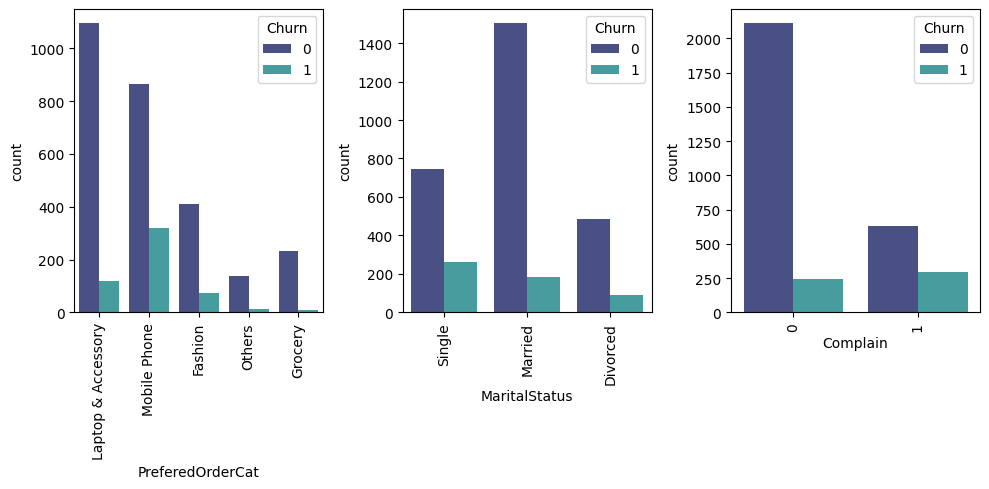

In [18]:
# Membuat barplot untuk melihat perbandingan nilai churn dan tidak churn pada kolom kategorik

# list of categorical variables to plot
cat_vars = ['PreferedOrderCat','MaritalStatus', 'Complain']

# create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i], palette='mako')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

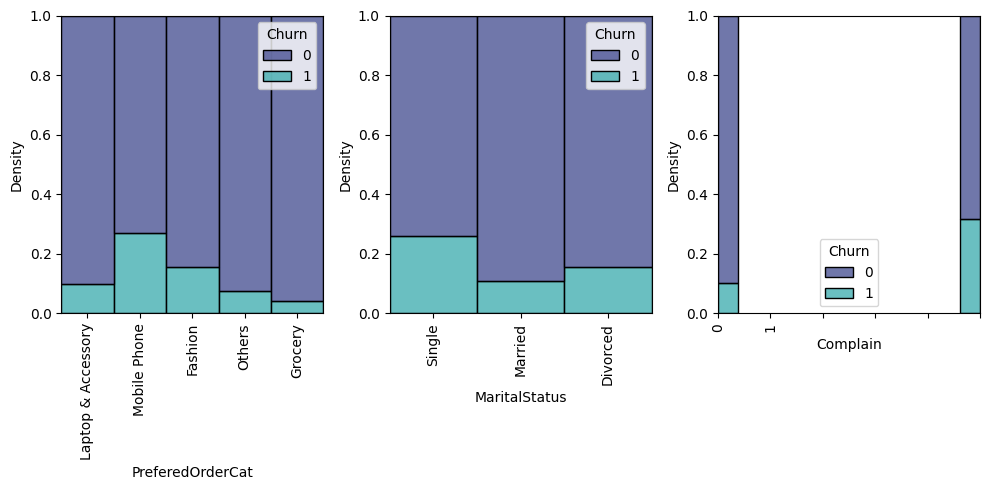

In [19]:
# Membuat stacking barplot untuk melihat perbandingan nilai churn dan tidak churn pada kolom kategorik

import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['PreferedOrderCat','MaritalStatus', 'Complain']

# create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(10,5))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Churn', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density', palette='mako')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

*Insight*

- Pada data kategorik nilai 0 atau seseorang tidak churn lebih besar daripada seseorang yang akan churn.
- Pada kolom `Prefered Order Cat`, orang dengan pembelian **Mobile Phone** cenderung akan melakukan churn daripada kategori lainnya. Ini bisa saja terjadi , dikarenakan keputusan pembelian ponsel dilihat dari faktor-faktor seperti masa pakai yang lebih panjang, pengeluaran biaya yang lebih tinggi, perubahan tren yang lebih lambat, serta perilaku dan preferensi konsumen yang berbeda dari pada pembelian dengan kategori lainnya. Ponsel dilihat sebagai investasi jangka panjang yang memerlukan pertimbangan lebih banyak, sementara barang lain lebih sering dibeli untuk memenuhi kebutuhan gaya yang cepat berubah dan keinginan akan variasi. Sedangkan Laptop dan Accesories, disini kami tidak mengetahui persis Accessory yang seperti apa yang masuk dalam kategori Accesorry apakah mempunyai sifat yang sama dengan fashion atau tidak.
- Pada kolom `Marital Status`, seseorang yang **Single** lebih cenderung meninggalkan aplikasi daripada seseorang yang **Married** atau **Divorce**. Jika kita asumsikan seseorang **Single** merupakan seseorang yang belum pernah menikah, tentu saja mereka juga belum pernah bercerai. Maka dapat kita asumsikan rata-rata seseorang yang single mempunyai usia yang lebih muda dan lebih energik serta kemampuan untuk mengeksplor dan membandingkan antar aplikasi lebih tinggi.
- pada kolom `Complain`, seseorang yang pernah komplain lebih cenderung akan melakukan churn, hal ini sudah kami jelaskan pada metriks bisnis bahwa seseorang yang complain mempunyai kecenderungan tidak puas dengan aplikasi sehingga kecenderunagn untuk churn juga lebih tinggi.

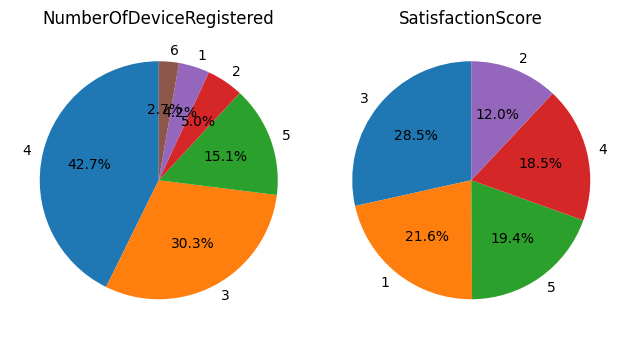

In [20]:
# Membuat pie chart untuk melihat presentase pelanggan dalam pemakaian device dan penilaian satisfaction

# get list of categorical variables
cat_vars = ['NumberOfDeviceRegistered', 'SatisfactionScore']

# create a figure and axes
fig, axs = plt.subplots(ncols=2)

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var}')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

*Insight*

- Pada kolom `Number of Device Registered` kebanyakan pelanggan mempunyai 3 sampai 4 perangkat dengan akun yang sama.
- Kolom `Satisfaction Score` memperlihatkan sebanyak 28,5% pelanggan memberikan nilai 3 yang artinya biasa saja dan 21,6% pelanggan memberikan nilai 1 yang berarti sangat tidak puas.

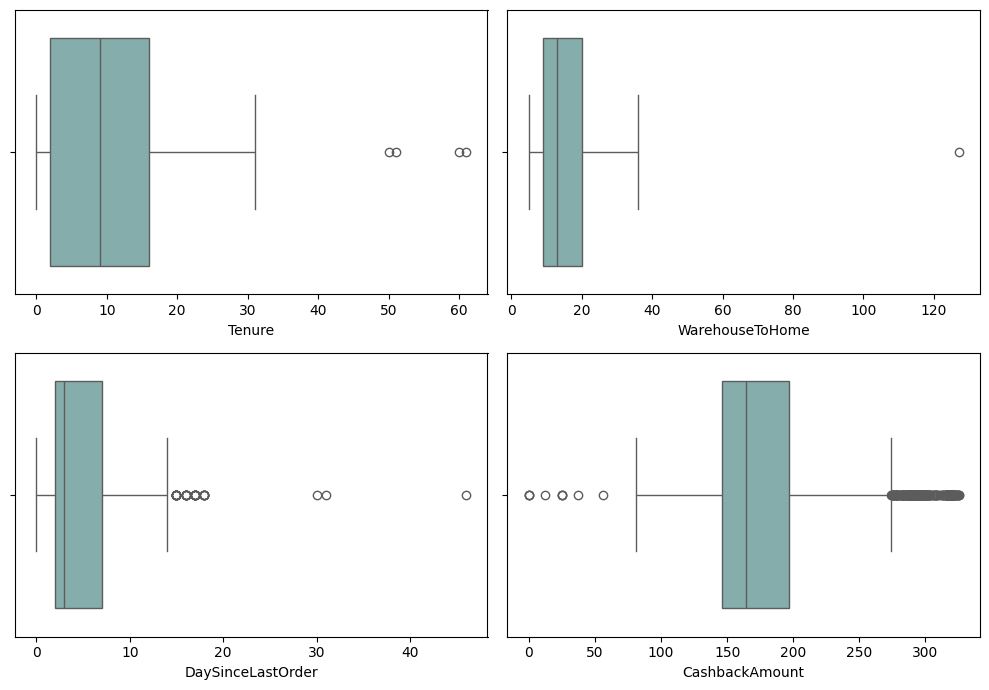

In [21]:
# Melihat nilai outlier pada kolom numerik dengan menggunakan boxplot

num_vars = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i], color='#7eb4b1')

fig.tight_layout()
plt.show()

*Insight*

Hampir semua kolom numerik terdapat outlier. Kami akan menghapus data dengan extreme outlier, pada kolom `Cashback Amount` tidak terdapat extreme outlier, maka outlier yang ada akan kami pertahankan.

In [22]:
# Melihat data outlier pada kolom Tenure

df['Tenure'].value_counts().sort_index()

Tenure
0.0     282
1.0     400
2.0     103
3.0     118
4.0     130
5.0     123
6.0     116
7.0     123
8.0     151
9.0     139
10.0    128
11.0    113
12.0     97
13.0     98
14.0     99
15.0     83
16.0     85
17.0     65
18.0     65
19.0     90
20.0     64
21.0     42
22.0     42
23.0     52
24.0     46
25.0     35
26.0     37
27.0     41
28.0     39
29.0     30
30.0     40
31.0     30
50.0      1
51.0      1
60.0      1
61.0      1
Name: count, dtype: int64

*Insight*

Pada boxplot `Tenure` terlihat ada 4 titik outlier, jika dilihat keseluruhan data, nilai **61, 60, 51, 50** angka yang hanya mempunyai 1 data saja dan nilai **50** mempunyai jarak yang jauh dengan nilai sebelumnya yaitu **31**. Maka ke emppat data ini akan kami drop.
Untuk men-drop nilai ini, terlebih dahulu kami akan mendapatkan index ke berapa yang membuat nilai tersebut.

In [23]:
# Mencari index data outlier

print(df[df['Tenure'] == 61].index)
print(df[df['Tenure'] == 60].index)
print(df[df['Tenure'] == 51].index)
print(df[df['Tenure'] == 50].index)

Index([51], dtype='int64')
Index([1209], dtype='int64')
Index([449], dtype='int64')
Index([3778], dtype='int64')


In [24]:
# Menghapus baris data outlier berdasarkan kolom Tenure

df.drop(index=[3778,449,1209,51], inplace=True)

Dengan cara yang sama, kami juga akan menghapus nilai extreme outlier pada kolom `Warehouse To Home` dan `Day Since Last Order`

In [25]:
# Melihat data outlier pada kolom Warehouse to Home

df['WarehouseToHome'].value_counts().sort_index()

WarehouseToHome
5.0        6
6.0      186
7.0      255
8.0      266
9.0      310
10.0     159
11.0     139
12.0     128
13.0     142
14.0     180
15.0     167
16.0     162
17.0     110
18.0      53
19.0      45
20.0      41
21.0      54
22.0      59
23.0      51
24.0      46
25.0      56
26.0      51
27.0      45
28.0      42
29.0      43
30.0      57
31.0      62
32.0      52
33.0      42
34.0      35
35.0      55
36.0      30
127.0      1
Name: count, dtype: int64

**Insight**

Nilai yang paling jauh dengan hanya terdapat 1 data saja adalah **127**, baris yang memuat nilai ini akan kami drop.

In [26]:
# Mencari index data outlier

print(df[df['WarehouseToHome'] == 127].index)

Index([2717], dtype='int64')


In [27]:
# Menghapus baris data outlier berdasarkan kolom Warehouse to Home

df.drop(index=[2717], inplace=True)

Jika mengacu pada boxplot sebelumnya, kolom `Day Since Last Order` mempunyai 7 titik nilai outlier diantaranya extreme outlier sebanyak tiga titik, outlier lainnya lebih mengelompok dan dekat ke batas atas dari boxplot.

In [28]:
# Melihat data outlier pada kolom Day Since Last Order

df['DaySinceLastOrder'].value_counts().sort_index()

DaySinceLastOrder
0.0     284
1.0     354
2.0     461
3.0     516
4.0     260
5.0     131
6.0      68
7.0     253
8.0     325
9.0     172
10.0     91
11.0     45
12.0     36
13.0     29
14.0     18
15.0     12
16.0      8
17.0     11
18.0      6
30.0      1
31.0      1
46.0      1
Name: count, dtype: int64

**Insight**

Tiga titik extreme outlier adalah dengan nilai **30,31, dan 46**

In [29]:
# Mencari index data outlier

print(df[df['DaySinceLastOrder'] == 30].index)
print(df[df['DaySinceLastOrder'] == 31].index)
print(df[df['DaySinceLastOrder'] == 46].index)

Index([181], dtype='int64')
Index([3830], dtype='int64')
Index([3591], dtype='int64')


In [30]:
# Menghapus baris data outlier berdasarkan kolom Warehouse to Home

df.drop(index=[181,3830,3591], inplace=True)

Selanjutnya kami cek kembali nilai outlier dengan boxplot, namun kami akan lihat jika data dibagi **Churn** dan **Tidak Churn**

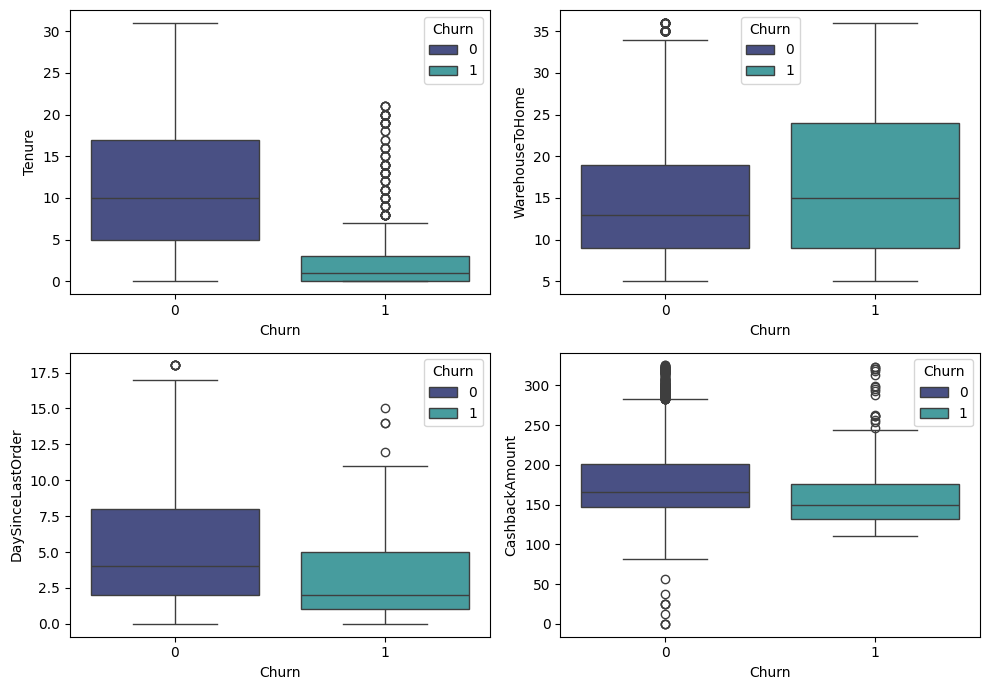

In [31]:
# Melihat nilai outlier pada kolom numerik dengan menggunakan boxplot

num_vars = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Churn', data=df, ax=axs[i], hue='Churn', palette='mako')

fig.tight_layout()
plt.show()

*Insight*

Boxplot diatas menggambarkan data pada kolom numerik dengan membagi data yang **Churn** dan **Tidak Churn**, hasilnya sudah tidak terdapat data yang extreme outlier.

Selanjutny akan kami lihat kolom-kolom mana saja yang terdapat missing value

<Axes: >

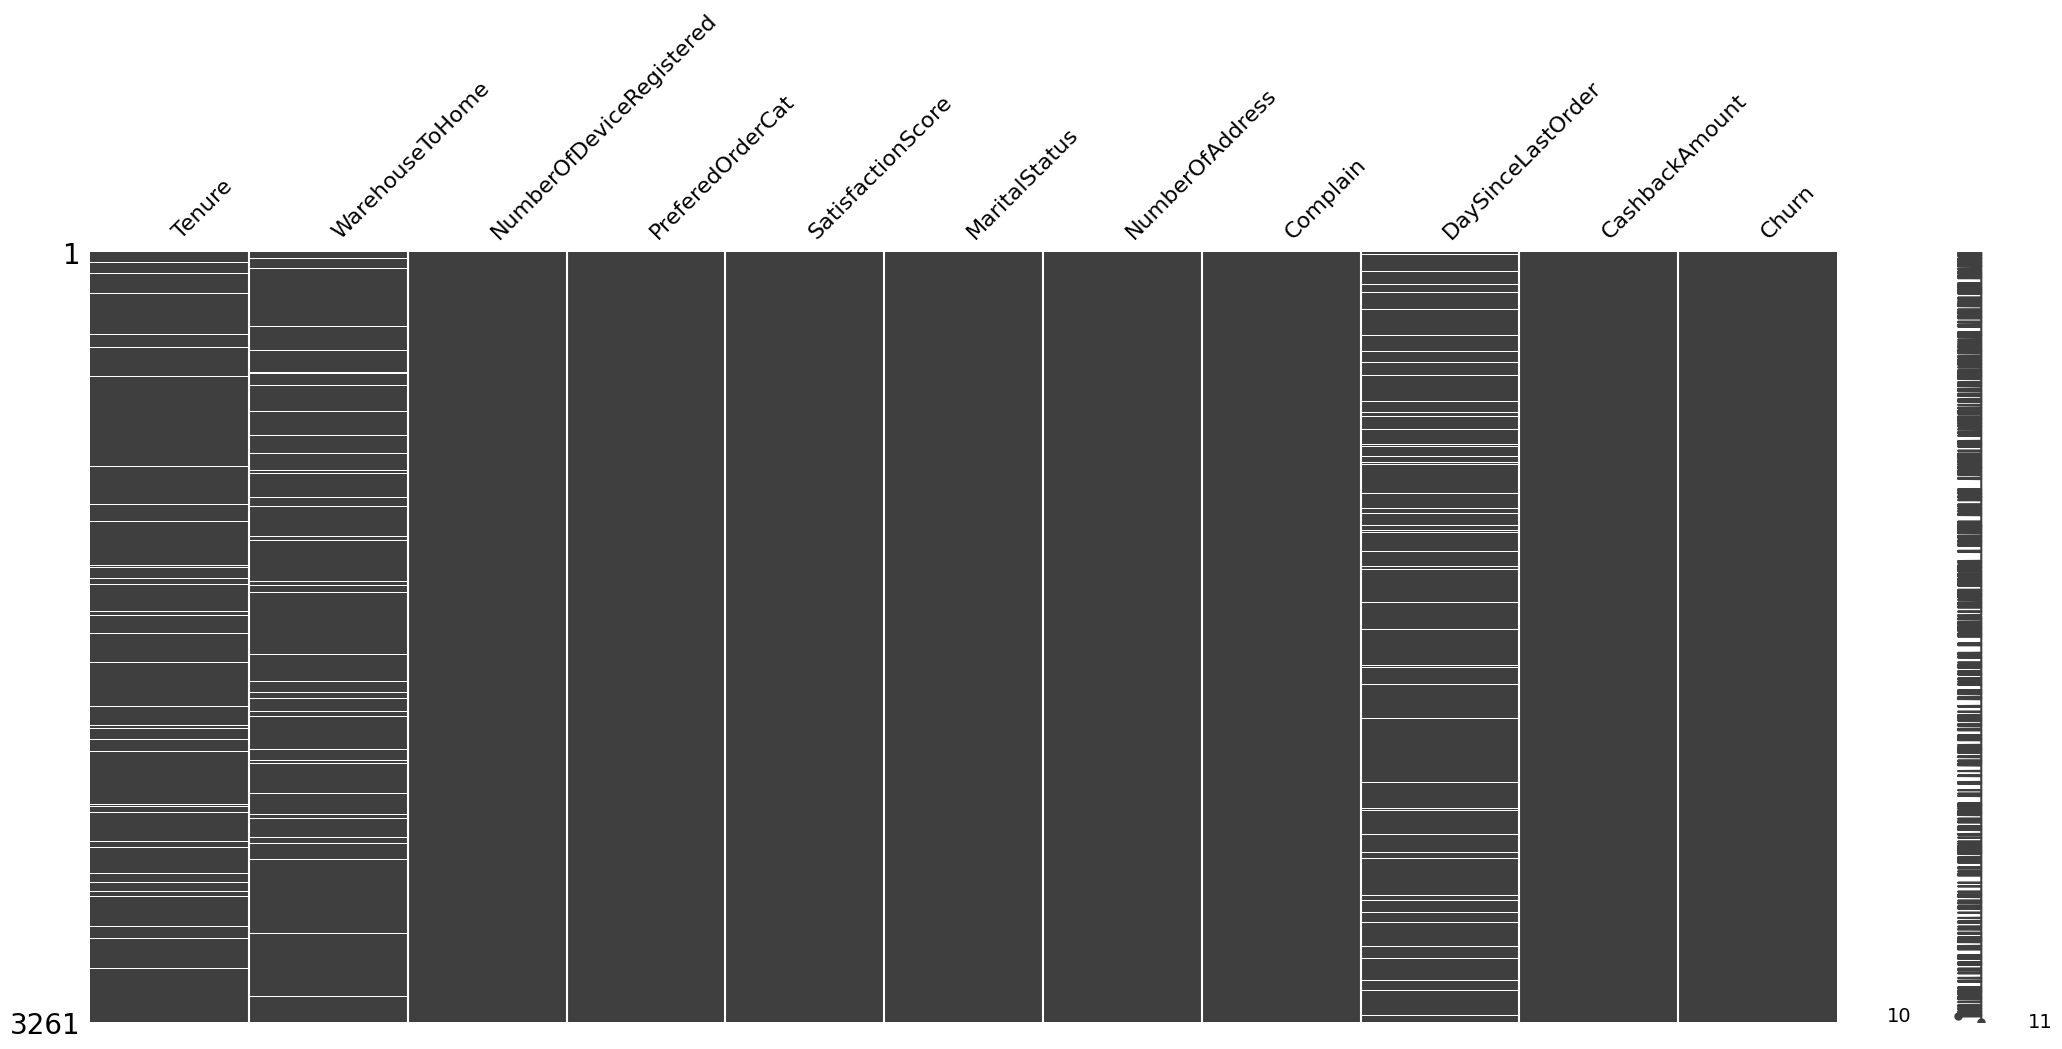

In [32]:
missingno.matrix(df)

*Insight*

Kolom yang mengandung missing value adalah `Tenure`, `Warehouse to Home` dan `Day Since Last Order`. Ketiga kolom ini merupakan kolom dengan type data numerik, maka pilihan untuk mengisi kolom tersebut adalah dengan **Mean** atau **Median**. Sebelum kami memutuskan dengan metode apa pengisian missing value tersebut, terlebih dahulu akan kami lihat distribusi persebaran data. Jika data normal maka akan kami lakukan pengisian missing value menggunakan **Mean** namun jika data tidka berdistribusi normal maka pengisian data menggunakan **Median** cara ini kami lakukan agar data dapat diinterpretasikan dengan nilai yang sebenarnya.

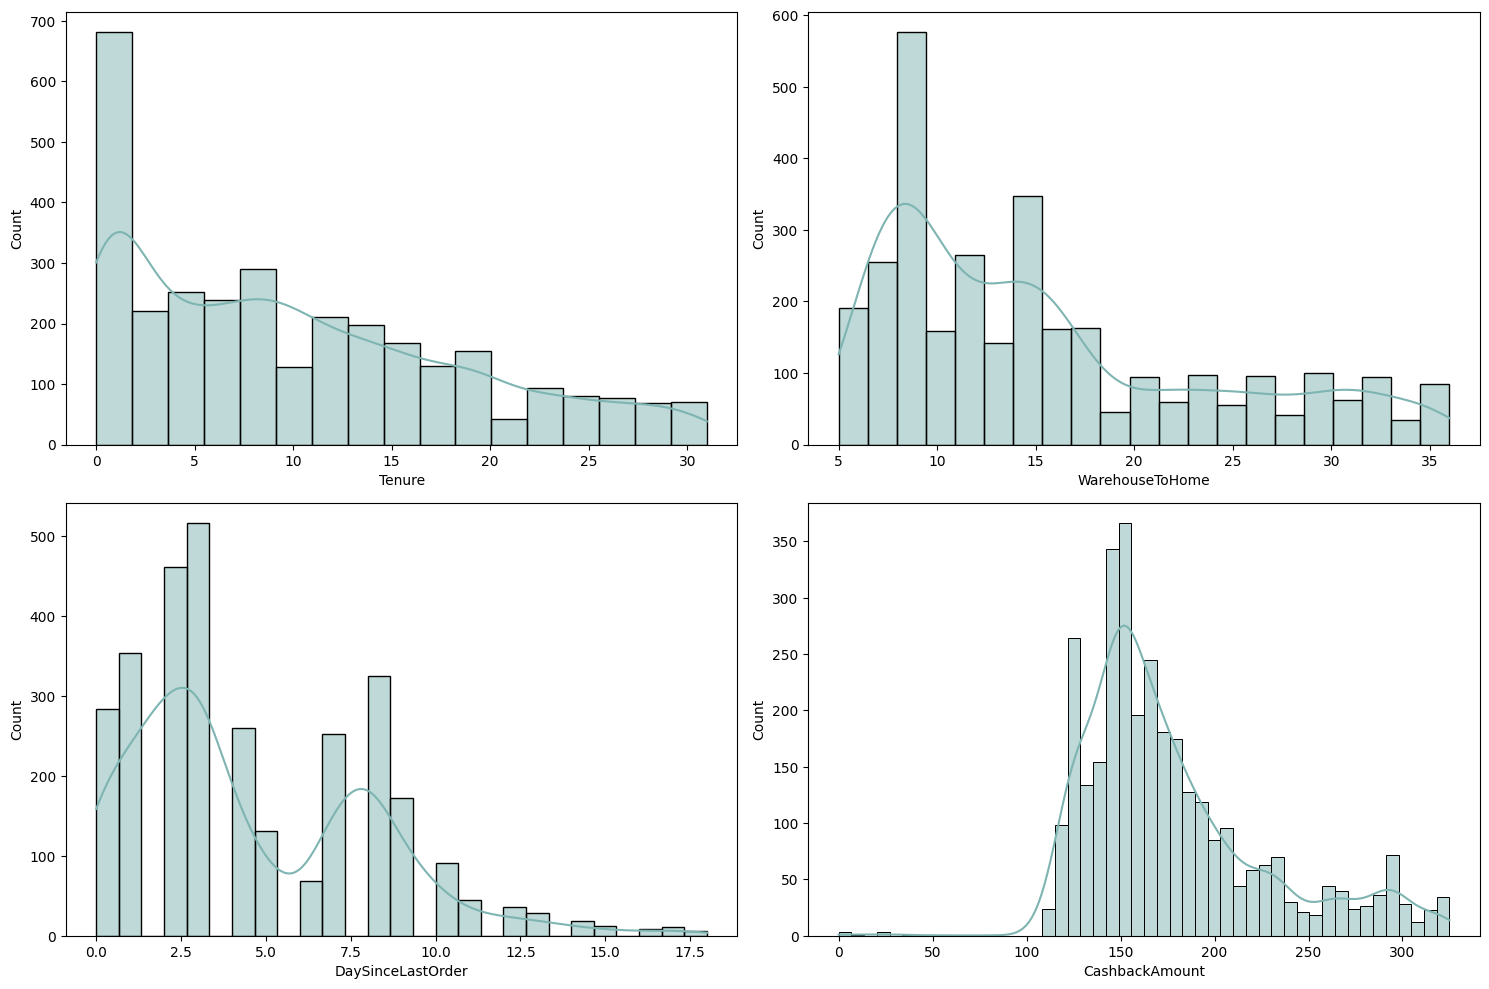

In [33]:
# Melihat distribusi data secara visual dengan histogram

num_vars = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i], color='#7eb4b1', kde=True)

fig.tight_layout()
plt.show()

*Insight*

Kami melihat persebaran data pada semua kolom numerik, dan hasilnya kolom-kolom tersebut tidak ada yang mempunyai garis berbentuk lonceng, yang artinya date berdistribusi normal. Maka jika ditinjau dari histogram dapat disimpulkan kolom-kolom tersebut **Tidak Berdistribusi Normal**, untuk meyakinkan akan kami uji kenormalan menggunakan KS-test

In [34]:
# Menguji kenormalan menggunakan KS-Test

print("H0 = Data Berdistribusi Normal")
print("H1 = Data Tidak Berdistribusi Normal\n")

for col in df.select_dtypes('number').columns:
  stat, pvalue = kstest('norm', df[col])
  if pvalue < 0.05:
    print(f'Tolak H0, {col} TIDAK BERDISTRIBUSI NORMAL')
  else:
    print(f'H0 diterima, {col} BERDISTRIBUSI NORMAL')
  print(f'dengan p-value {col} : {pvalue.round(3)}\n')

H0 = Data Berdistribusi Normal
H1 = Data Tidak Berdistribusi Normal

Tolak H0, Tenure TIDAK BERDISTRIBUSI NORMAL
dengan p-value Tenure : 0.0

Tolak H0, WarehouseToHome TIDAK BERDISTRIBUSI NORMAL
dengan p-value WarehouseToHome : 0.0

Tolak H0, NumberOfDeviceRegistered TIDAK BERDISTRIBUSI NORMAL
dengan p-value NumberOfDeviceRegistered : 0.0

Tolak H0, SatisfactionScore TIDAK BERDISTRIBUSI NORMAL
dengan p-value SatisfactionScore : 0.0

Tolak H0, NumberOfAddress TIDAK BERDISTRIBUSI NORMAL
dengan p-value NumberOfAddress : 0.0

Tolak H0, Complain TIDAK BERDISTRIBUSI NORMAL
dengan p-value Complain : 0.0

Tolak H0, DaySinceLastOrder TIDAK BERDISTRIBUSI NORMAL
dengan p-value DaySinceLastOrder : 0.0

Tolak H0, CashbackAmount TIDAK BERDISTRIBUSI NORMAL
dengan p-value CashbackAmount : 0.0

Tolak H0, Churn TIDAK BERDISTRIBUSI NORMAL
dengan p-value Churn : 0.0



*Insight*

Dari kesemua kolom tidak ada kolom yang berdistribusi normal, sehingga metode yang dipakai dalam input missing value adalah **Median**

Selanjutnya kami melihat perbandingan data **Churn** dan **Tidak Churn**, perbandingan ini kami lakukan untuk menyimpulkan apakah keduanya seimbang atau tidak. Jika data tidak seimbang maka perlu dilakukan **Resampler**.

In [35]:
# Melihat perbandingan Median Data Target antar kolom

for col in df.select_dtypes('number').columns:
  print(f'Perbandingan Churn dan Tidak Churn berdasarkan {col}')
  churn1 = df.groupby('Churn')[col].median()
  print(f'Orang yang Churn memiliki nilai median {col} sebsesar {churn1[1]}')
  print(f'Orang yang Tidak Churn memiliki nilai median {col} sebsesar {churn1[0]}\n')

Perbandingan Churn dan Tidak Churn berdasarkan Tenure
Orang yang Churn memiliki nilai median Tenure sebsesar 1.0
Orang yang Tidak Churn memiliki nilai median Tenure sebsesar 10.0

Perbandingan Churn dan Tidak Churn berdasarkan WarehouseToHome
Orang yang Churn memiliki nilai median WarehouseToHome sebsesar 15.0
Orang yang Tidak Churn memiliki nilai median WarehouseToHome sebsesar 13.0

Perbandingan Churn dan Tidak Churn berdasarkan NumberOfDeviceRegistered
Orang yang Churn memiliki nilai median NumberOfDeviceRegistered sebsesar 4.0
Orang yang Tidak Churn memiliki nilai median NumberOfDeviceRegistered sebsesar 4.0

Perbandingan Churn dan Tidak Churn berdasarkan SatisfactionScore
Orang yang Churn memiliki nilai median SatisfactionScore sebsesar 3.0
Orang yang Tidak Churn memiliki nilai median SatisfactionScore sebsesar 3.0

Perbandingan Churn dan Tidak Churn berdasarkan NumberOfAddress
Orang yang Churn memiliki nilai median NumberOfAddress sebsesar 3.0
Orang yang Tidak Churn memiliki nila

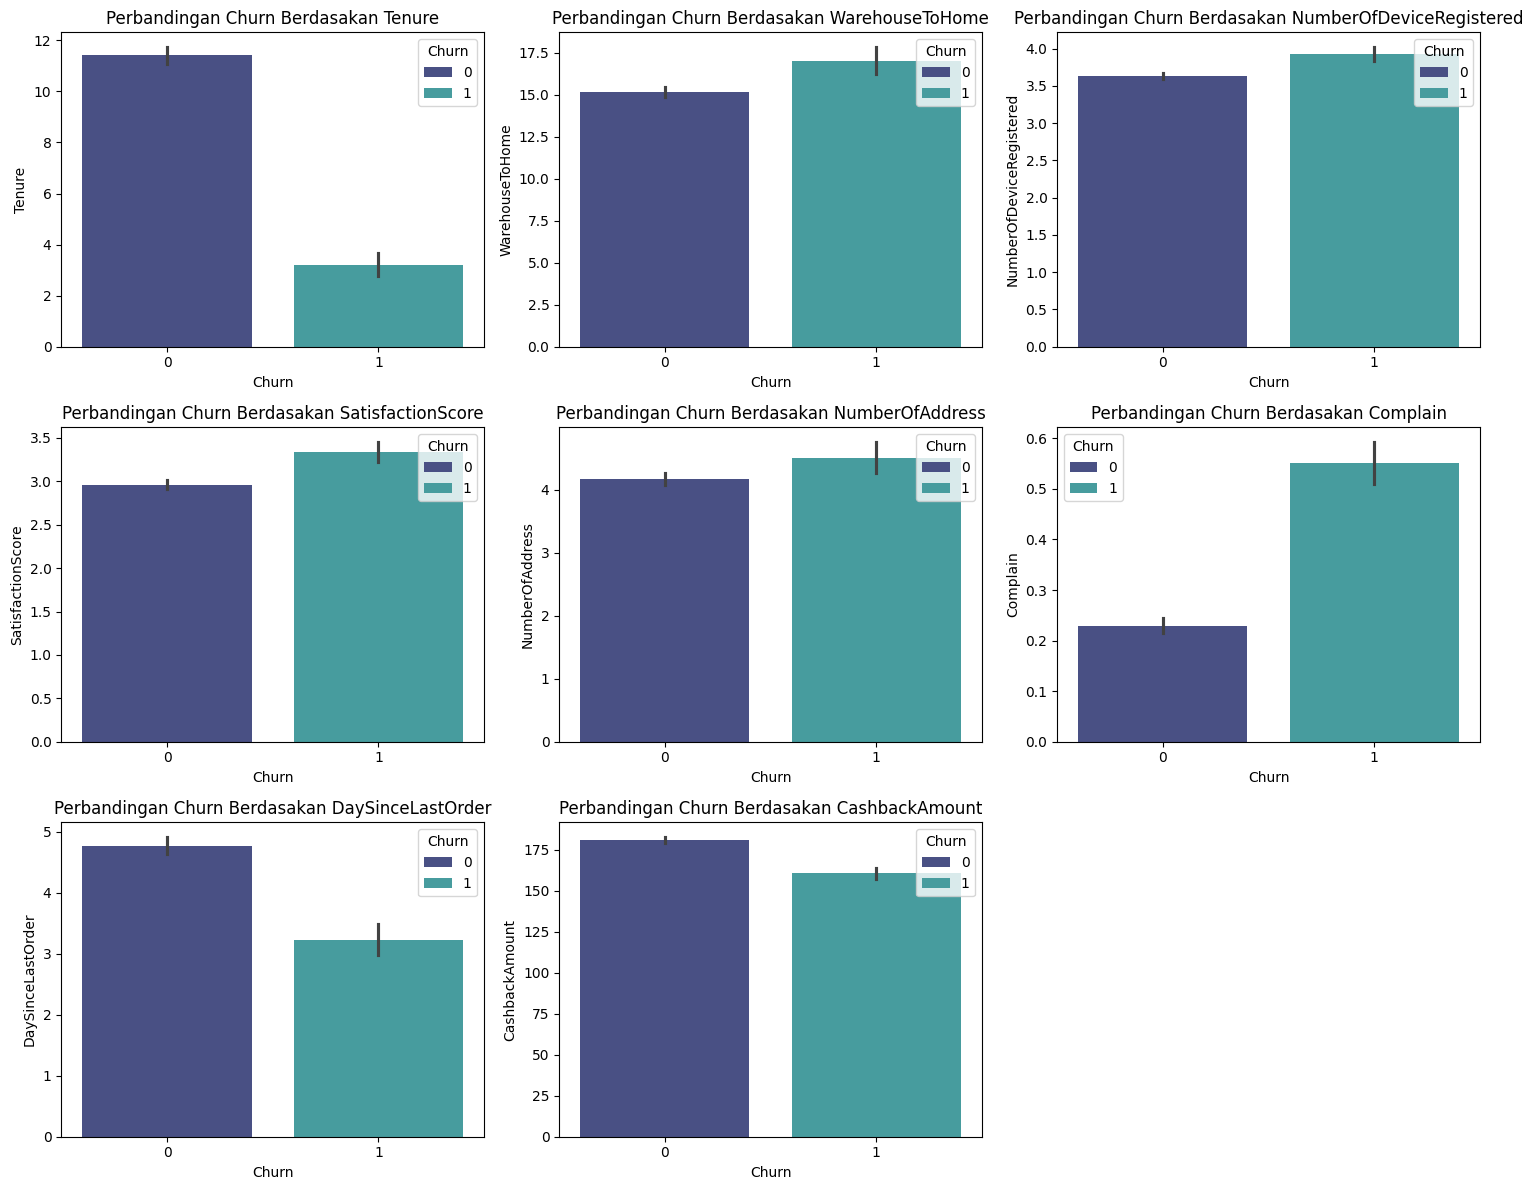

In [36]:
#Membuat barplot dari perbandingan median data target antar kolom numerik

plt.figure(figsize=(15,12))
for idx, col in enumerate(df.drop(columns='Churn').select_dtypes('number').columns):
  barplot = sns.barplot(data=df, x='Churn', y=col, palette='mako', hue='Churn', ax=plt.subplot(3,3,idx+1))
  barplot.set_title(f'Perbandingan Churn Berdasakan {col}')

plt.tight_layout()
plt.show()

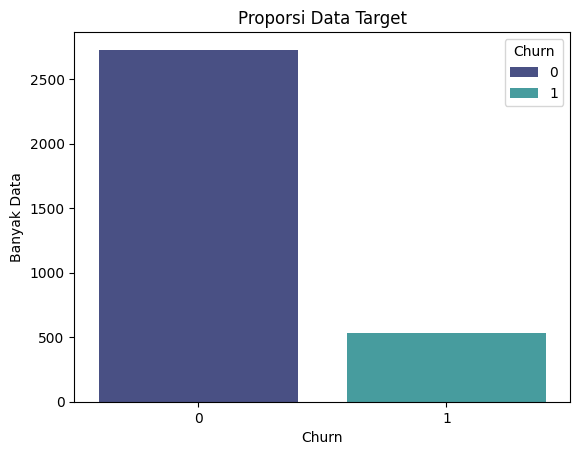

In [37]:
# Melihat proporsi data target

Churn_proporsi=df['Churn'].value_counts().reset_index()
sns.barplot(data=Churn_proporsi, x='Churn', y='count', palette='mako', hue='Churn')
plt.ylabel('Banyak Data')
plt.xlabel('Churn')
plt.title('Proporsi Data Target')
plt.show()

*Insight*

Pada kolom `Churn` nilai 0 atau **tidak churn** cenderung lebih banyak dan data tidak seimbang. Jika dibiarkan hal ini akan mempengaruhi performa model dalam memprediksi, sehinga perlu dilakukan resampler.

Selanjutnya akan kami siapkan data untuk pembuatan model machine learning

#**4. Data Preparation**


Data preparation adalah proses penting dalam analisis data dan machine learning yang melibatkan pengolahan dan transformasi data mentah menjadi format yang bersih dan siap digunakan untuk analisis atau model pelatihan. Proses ini mencakup beberapa langkah, termasuk pembersihan data, transformasi, penggabungan, dan pengurangan data

Terlebih dahulu kami inisialisasi metode-metode yang kami gunakan untuk data preparation, hal ini dilakukan agar pemanggilan fungsi lebih mudah.

In [38]:
# Initialization


# Init Condition
rs = 48
split_size = 0.2

# Scaller
robust = RobustScaler()

# Encoder
ohe = OneHotEncoder(drop='first')

# Sampling
ros = RandomOverSampler(random_state=rs)
smote = SMOTE(random_state=rs)
rus = RandomUnderSampler(random_state=rs)
cnn = CondensedNearestNeighbour(random_state=rs)
combine = SMOTEENN(random_state=rs)

# Estimator
logreg = LogisticRegression(random_state=rs)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=rs)
rf = RandomForestClassifier(random_state=rs)
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier(random_state=rs)


skf = StratifiedKFold()

Kami akan jabarkan inisialisasi metode-metode yang akan kami pakai.

| Metode | Penjelasan |
| --- | --- |
|**Random Sampler** | penggunaan random_state=48 bertujuan untuk memastikan bahwa
| |pembagian dataset menjadi set pelatihan dan pengujian selalu konsisten |
|**Split Size** | Kami membagi dataset menjadi set pelatihan (training set) dan set pengujian (test set),
| | test_size=0.2 berarti 20% dari data akan digunakan sebagai set pengujian, sementara 80%
| |sisanya akan digunakan sebagai set pelatihan |
|**Robust Scaler** | Teknik ini digunakan untuk mengurangi dampak outlier dalam data saat menormalisasi fitur.
| | RobustScaler mengubah nilai fitur berdasarkan median dan interquartile range (IQR),
| | sehingga lebih tahan terhadap outlier.|
|**One Hot Encoder**| OneHotEncoder adalah teknik encoding yang digunakan dalam preprocessing data untuk mengubah
| | fitur kategorikal (nominal) menjadi bentuk yang dapat digunakan dalam algoritma machine learning.
| | Teknik ini mengubah setiap kategori unik menjadi vektor biner (hanya terdiri dari 0 dan 1),
| | di mana hanya satu elemen dalam vektor yang bernilai 1 dan sisanya bernilai 0. Hal ini memungkinkan
| | algoritma machine learning untuk bekerja dengan data kategorikal dengan lebih efisien.|


Kemudia kami mencoba beberapa metode resampler seperti **Random Over Sampler**, **SMOTE**, **Random Under Sampler**, **Condense Near Neighbour**, dan **SMOTEENN**. Berikut akan kami jelaskan satu persatu kedalam tabel.

| Metode | Penjelasan |
| --- | --- |
| Random Over Sampler | Random Over-Sampling adalah teknik yang menambahkan salinan acak dari contoh-contoh kelas minoritas ke dataset hingga mencapai keseimbangan yang diinginkan.|
| Random Under Sampler | Random Under-Sampling adalah teknik yang menghapus contoh-contoh acak dari kelas mayoritas hingga mencapai keseimbangan yang diinginkan.|
| SMOTE | SMOTE adalah teknik yang membuat contoh sintetis dari kelas minoritas dengan menginterpolasi antara contoh yang ada.|
| CNN | Condensed Nearest Neighbor (CNN) adalah metode under-sampling yang bertujuan untuk mengurangi jumlah contoh dalam kelas mayoritas sambil mempertahankan kemampuan klasifikasi dataset.|
| SMOTEENN | Teknik ini pertama-tama menggunakan SMOTE untuk oversampling kelas minoritas dengan membuat contoh sintetis,
| | kemudian menggunakan ENN (Edited Nearest NEighbour)vuntuk membersihkan dataset dengan menghapus contoh yang salah diklasifikasikan oleh tetangga terdekatnya.|

Pada estimator kami juga mencoba beberapa estimator untuk klasifikasi seperti **Logistic Regression**, **K-Nearest Neighbors (KNN)**, **Decision Tree**, **Random Forest**, **XGBoost**, dan **LightGBM (Light Gradient Boosting Machine)**.

In [39]:
# Melihat gambaran Data Frame

df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3102 non-null   float64
 1   WarehouseToHome           3126 non-null   float64
 2   NumberOfDeviceRegistered  3261 non-null   int64  
 3   PreferedOrderCat          3261 non-null   object 
 4   SatisfactionScore         3261 non-null   int64  
 5   MaritalStatus             3261 non-null   object 
 6   NumberOfAddress           3261 non-null   int64  
 7   Complain                  3261 non-null   int64  
 8   DaySinceLastOrder         3080 non-null   float64
 9   CashbackAmount            3261 non-null   float64
 10  Churn                     3261 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 305.7+ KB


Dengan melihat data frame dan juga type data diatas, maka langkah-lngkah dalam penanganan ke machine learning adalah sebagai berikut.

1. Kolom yang menjadi **Target** adalah `Churn` dan kolom lain **Feature**. Disini kami menggunakan semua faktor-faktor yang ada sebagai feature dan tidak ada yang kolom yang kami drop.
2. Kolom yang mengandung missing value seperti `Tenure`, `Warehouse To Home`, dan `Day Since Last Order` akan kami input menggunakan **Simple Imputer** dengan strategy **Median**. Sudah kami jelaskan pada exploratory data bahwa kolom-kolom tersebut tidak berdistribusi normal, sehingga kami memutuskan menggunakan **Median**.
3. Setelah dilakukan penginputan kepada tiga kolom yang mengandung missing value tersebut, selanjutnya akan kami lakukana **Scaling** dengan metode **Robust Scaler**, hal ini kami lakukan untuk menghindari outlier karena pada data cleaning kami hanya menghapus extreme outlier.
4. Pada kolom yang bersifat kategorik seperti `Prefered Orde Cat`, `Satisfaction Score`, `Marital Status`, dan `Complain` kami lakukan **Encoding** dengan metode **One Hot Encoding**.
5. Pada kolom numerik seperti `Number of Device Registered`, `Number Of Address`, dan `Cashback Amount` kami lakukan **Scaling** dengan metode **Robust Sacler**.
6. Kami menggunakan *test_size* sebesar 0.2 yang artinya kami lakukan pembagian data test dan data training sebesar **1:4**

In [41]:
# Imputation Missing Value

scalling_robust_imp = Pipeline(steps=[
    ('Imputation_median', SimpleImputer(strategy='median')),
    ('Scaller_robust', RobustScaler())
])

In [42]:
# Transformer object

transformer = ColumnTransformer(transformers=[
    ('Imputation', scalling_robust_imp, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
    ('Encoding', ohe, ['PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']),
    ('Scaling', robust, ['NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount' ])
])

In [43]:
# Membagi kolom mana yang merupakan `Target` dan `Feature`

feature = df.drop('Churn', axis=1)
target = df['Churn']

In [44]:
# Membagi Data Test dan Train

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = split_size, stratify=target ,random_state=rs)

In [45]:
# Melihat ukran dana train

print(X_train.shape)
print(y_train.shape)

(2608, 10)
(2608,)


#**5. Model Development**

Model development adalah proses yang komprehensif dan iteratif yang bertujuan untuk menghasilkan model machine learning yang andal dan akurat. Proses ini mencakup beberapa langkah mulai dari pemilihan dan pembersihan data hingga evaluasi dan deployment model.

In [46]:
# Membuat pipe model

pipe_model = imb_pipeline(steps=[
    ('transformer ', transformer),
    ('resampler', ros),
    ('estimator', logreg)
])

In [47]:
# Membuat list model estimator

list_est = [logreg, knn, dt, rf, xgb, lgbm]

In [48]:
# Membuat list metode resampler

list_sampling = [ros, smote, rus, cnn, combine]

In [49]:
# Membuat param space dengan list resampler dan list estimator yang telah dibuat

param_space = {
    'resampler' : list_sampling,
    'estimator': list_est
}

In [50]:
# Membuat grid search dari list estimator dan list resampler

gridsearch_model = GridSearchCV(
    estimator = pipe_model,
    param_grid = param_space,
    cv = skf,
    scoring = 'recall',
    return_train_score=True,
    verbose=1
)

In [51]:
# Fitting data train kesemua model yang telah dilakukan oleh grid search

gridsearch_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 1746, number of negative: 1746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 3492, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1746, number of negative: 1746
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 3492, number of used features: 17
[LightGBM] [Info] [

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer ',
                                        ColumnTransformer(transformers=[('Imputation',
                                                                         Pipeline(steps=[('Imputation_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaller_robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('Encoding',
                                                                         OneHotEncoder(drop...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...),
                                       LGBMClassifier(random_state=48)],
                         'resampler': [RandomOverSampler(random_state=48),
                                       SMOTE(random_state=48),
                                       RandomUnderSampler(random_state=48),
                                       CondensedNearestNeighbour(random_state=48),
                                       SMOTEENN(random_state=48)]},
             return_train_score=True, scoring='recall', verbose=1)

In [52]:
# Mendapatkan model terbaik

pd.DataFrame(gridsearch_model.cv_results_).sort_values('rank_test_score')[['param_estimator','param_resampler','rank_test_score','mean_test_score','mean_train_score','std_test_score']]

,param_estimator,param_resampler,rank_test_score,mean_test_score,mean_train_score,std_test_score
27,LGBMClassifier(random_state=48),RandomUnderSampler(random_state=48),1,0.868235,1.000000,0.031917
22,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),2,0.861176,1.000000,0.035993
4,LogisticRegression(random_state=48),SMOTEENN(random_state=48),3,0.849412,0.868235,0.053345
17,RandomForestClassifier(random_state=48),RandomUnderSampler(random_state=48),4,0.844706,1.000000,0.046705
9,KNeighborsClassifier(),SMOTEENN(random_state=48),5,0.828235,0.968824,0.047410
2,LogisticRegression(random_state=48),RandomUnderSampler(random_state=48),6,0.818824,0.818824,0.055482
0,LogisticRegression(random_state=48),RandomOverSampler(random_state=48),7,0.814118,0.827647,0.065882
12,DecisionTreeClassifier(random_state=48),RandomUnderSampler(random_state=48),8,0.800000,1.000000,0.044644
1,LogisticRegression(random_state=48),SMOTE(random_state=48),9,0.797647,0.815294,0.044891
29,LGBMClassifier(random_state=48),SMOTEENN(random_state=48),10,0.795294,0.960000,0.062960


In [53]:
# Menyimpan model

filename = 'best_model_0.sav'

pickle.dump(gridsearch_model, open(filename, 'wb'))

In [54]:
with open('best_model_0.sav', 'rb') as file:
  best_model_0 = pickle.load(file)

In [55]:
testing_model_0 = best_model_0.best_estimator_
testing_model_0

Pipeline(steps=[('transformer ',
                 ColumnTransformer(transformers=[('Imputation',
                                                  Pipeline(steps=[('Imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaller_robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus',
                                                   'Complain']),
                                                 ('Scaling', RobustScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'CashbackAmount'])])),
                ('resampler', RandomUnderSampler(random_state=48)),
                ('estimator', LGBMClassifier(random_state=48))])

In [56]:
# Testing Model

y_pred_0 = testing_model_0.predict(X_test)

In [57]:
# Classification report

print(classification_report(y_test, y_pred_0))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       546
           1       0.53      0.88      0.66       107

    accuracy                           0.85       653
   macro avg       0.75      0.86      0.78       653
weighted avg       0.90      0.85      0.87       653



*Insight*

Model terbaik adalah

1. Light GBM Classifier dengan metode resampler Random Under Sampling
2. XGBoost Classifier dengan metode resampler Random Under Sampling
3. Logistic Regression dengan resampler SMOTEEN.

Maka kami akan melakukan tunning dengan kedua model terbaik diatas.

#**6. Tuning Parameter**

Tuning parameter, atau dikenal juga sebagai hyperparameter tuning, adalah proses mencari kombinasi terbaik dari hyperparameter dalam sebuah model machine learning untuk mencapai performa optimal. Hyperparameter adalah parameter yang nilainya tidak ditentukan oleh model itu sendiri melalui proses pembelajaran, melainkan harus diatur secara manual sebelum pelatihan model dimulai. Setiap algoritme machine learning memiliki hyperparameter tertentu yang mengontrol bagaimana model akan belajar dari data dan bagaimana fitur-fitur tertentu akan diperhitungkan.

## Best Model 1 (LGBM Classifier & RUS)

In [58]:
# Tuning Parameter dengan LGBM Classifier

param_space_tuning_2 = {
    'estimator':[lgbm],
    'resampler' :[rus],
    'estimator__boosting_type' : ['gbdt', 'dart', 'rf'],
    'estimator__num_leaves' : [31,21,41],
    'estimator__max_depth': [-1,10,20],
    'estimator__subsample_for_bin':[200000,100000,150000],
    'estimator__min_split_gain' : [0,0.3,0.5],
    'estimator__min_child_weight' : [0.001,0.01,0.1],
    'estimator__min_child_samples' : [10,20,30]
}

gridsearch_tuning_2 = GridSearchCV(
    estimator = pipe_model,
    param_grid = param_space_tuning_2,
    cv = skf,
    scoring = 'recall',
    return_train_score=True,
    verbose=1
)


In [59]:
# Fitting Model

gridsearch_tuning_2.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] [Info] Number of positive: 340, number of negative: 340
[LightGBM] 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer ',
                                        ColumnTransformer(transformers=[('Imputation',
                                                                         Pipeline(steps=[('Imputation_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaller_robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('Encoding',
                                                                         OneHotEncoder(drop...
                         'estimator__max_depth': [-1, 10, 20],
                         'estimator__min_child_samples': [10, 20, 30],
                         'estimator__min_child_weight': [0.001, 0.01, 0.1],
                         'estimator__min_split_gain': [0, 0.3, 0.5],
                         'estimator__num_leaves': [31, 21, 41],
                         'estimator__subsample_for_bin': [200000, 100000,
                                                          150000],
                         'resampler': [RandomUnderSampler(random_state=48)]},
             return_train_score=True, scoring='recall', verbose=1)

In [60]:
pd.DataFrame(gridsearch_tuning_2.cv_results_).sort_values('rank_test_score')[['param_estimator','param_resampler','rank_test_score','mean_test_score','mean_train_score','std_test_score']].head()

,param_estimator,param_resampler,rank_test_score,mean_test_score,mean_train_score,std_test_score
0,"LGBMClassifier(min_child_samples=10, min_split...",RandomUnderSampler(random_state=48),1,0.870588,1.0,0.037203
56,"LGBMClassifier(min_child_samples=10, min_split...",RandomUnderSampler(random_state=48),1,0.870588,1.0,0.035684
55,"LGBMClassifier(min_child_samples=10, min_split...",RandomUnderSampler(random_state=48),1,0.870588,1.0,0.035684
54,"LGBMClassifier(min_child_samples=10, min_split...",RandomUnderSampler(random_state=48),1,0.870588,1.0,0.035684
28,"LGBMClassifier(min_child_samples=10, min_split...",RandomUnderSampler(random_state=48),1,0.870588,1.0,0.037203


In [61]:
# Menyimpan file kedalam bentuk SAV

filename = 'best_model_tuning_2.sav'

pickle.dump(gridsearch_tuning_2, open(filename, 'wb'))

In [62]:
with open('best_model_tuning_2.sav', 'rb') as file:
  best_model_2 = pickle.load(file)

In [63]:
testing_model_2 = best_model_2.best_estimator_
testing_model_2

Pipeline(steps=[('transformer ',
                 ColumnTransformer(transformers=[('Imputation',
                                                  Pipeline(steps=[('Imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaller_robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus',
                                                   'Complain']),
                                                 ('Scaling', RobustScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'CashbackAmount'])])),
                ('resampler', RandomUnderSampler(random_state=48)),
                ('estimator',
                 LGBMClassifier(min_child_samples=10, min_split_gain=0,
                                random_state=48))])

In [64]:
# Memprediksi model

y_pred_2 = testing_model_2.predict(X_test)

In [65]:
# Classification report

print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       546
           1       0.53      0.86      0.65       107

    accuracy                           0.85       653
   macro avg       0.75      0.85      0.78       653
weighted avg       0.90      0.85      0.86       653



Berdasarkan hasil hyperparameter tuning pertama diatas diketahui:
- **LGBM sebelum Tune** memiliki nilai Recall sebesar 88%. Ini berarti dari seluruh pelanggan yang benar-benar akan churn dalam data train, model berhasil mengidentifikasi 88% dari mereka dengan benar. Semakin tinggi nilai Recall, semakin sedikit pelanggan yang sebenarnya akan churn yang terlewatkan oleh model.
- **LGBM sesudah Tune** memiliki nilai Recall sebesar 86%. Ini menunjukkan bahwa model, setelah diuji pada data yang belum pernah dilihat sebelumnya (data test), dapat mengidentifikasi 86% dari seluruh pelanggan yang benar-benar akan churn dengan benar.

Dari nilai Recall yang diperoleh pada kedua data, dapat disimpulkan bahwa model LGBM yang telah mengalami tuning belum memiliki kinerja yang belum optimal dalam mengidentifikasi pelanggan yang benar-benar akan churn, baik pada data train maupun data test.


## Best Model 2: (XGB & RUS)

In [66]:
# Tuning Parameter dengan XGBoost

param_space_tuning_3 = {
    'estimator':[xgb],
    'resampler' :[rus],
    'estimator__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7, 9],
    'estimator__subsample': [0.6, 0.8, 1.0],
    'estimator__colsample_bytree': [0.6, 0.8, 1.0]
}

gridsearch_tuning_3 = GridSearchCV(
    estimator = pipe_model,
    param_grid = param_space_tuning_3,
    cv = skf,
    scoring = 'recall',
    return_train_score=True,
    verbose=1
)


In [67]:
# Fitting model

gridsearch_tuning_3.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer ',
                                        ColumnTransformer(transformers=[('Imputation',
                                                                         Pipeline(steps=[('Imputation_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaller_robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('Encoding',
                                                                         OneHotEncoder(drop...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                         'estimator__colsample_bytree': [0.6, 0.8, 1.0],
                         'estimator__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'estimator__max_depth': [3, 5, 7, 9],
                         'estimator__subsample': [0.6, 0.8, 1.0],
                         'resampler': [RandomUnderSampler(random_state=48)]},
             return_train_score=True, scoring='recall', verbose=1)

In [68]:
pd.DataFrame(gridsearch_tuning_3.cv_results_).sort_values('rank_test_score')[['param_estimator','param_resampler','rank_test_score','mean_test_score','mean_train_score','std_test_score']].head()

,param_estimator,param_resampler,rank_test_score,mean_test_score,mean_train_score,std_test_score
140,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),1,0.863529,1.000000,0.036147
32,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),1,0.863529,0.999412,0.055482
143,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),3,0.861176,1.000000,0.038948
79,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),4,0.858824,0.998824,0.030679
128,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=48),4,0.858824,1.000000,0.037940


In [69]:
# Menyimpan model kedalam SAV

filename = 'best_model_tuning_3.sav'

pickle.dump(gridsearch_tuning_3, open(filename, 'wb'))

In [70]:
with open('best_model_tuning_3.sav', 'rb') as file:
  best_model_3 = pickle.load(file)

In [71]:
testing_model_3 = best_model_3.best_estimator_
testing_model_3

Pipeline(steps=[('transformer ',
                 ColumnTransformer(transformers=[('Imputation',
                                                  Pipeline(steps=[('Imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaller_robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus',
                                                   'Complain']),
                                                 ('Scali...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [72]:
# Memprediksi model

y_pred_3 = testing_model_3.predict(X_test)

In [73]:
# Classification report

print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       546
           1       0.54      0.88      0.67       107

    accuracy                           0.86       653
   macro avg       0.75      0.87      0.79       653
weighted avg       0.90      0.86      0.87       653



Berdasarkan hasil hyperparameter tuning pertama diatas diketahui:

- **XGB setelah Tune** memiliki nilai Recall sebesar 88%. Ini menunjukkan bahwa model, setelah diuji pada data yang belum pernah dilihat sebelumnya (data test), dapat mengidentifikasi 88% dari seluruh pelanggan yang benar-benar akan churn dengan benar.

Dari nilai Recall yang diperoleh pada sebelum Tuning dan setelah Tuning, dapat disimpulkan bahwa model XG Boost dengan metode resampler Random Under Sampler yang telah mengalami tuning memiliki kinerja yang baik dalam mengidentifikasi pelanggan yang benar-benar akan churn, baik pada data train maupun data test.  


## Best Model 3: (Logistic Regression & SMOTEEN)

In [74]:
# Tuning Parameter dengan Logistic Regression

param_space_tuning_1 = {
    'estimator':[logreg],
    'resampler' :[combine],
    'estimator__penalty' : ['l1','l2','elasticnet'],
    'estimator__tol' : [1e-4,1e-2,1,10],
    'estimator__C': [1, 10, 0.1, 0.01],
    'estimator__class_weight':[None, 'balanced'],
    'estimator__solver' : ['liblinear', 'lbfgs', 'newton-cholesky'],
    'estimator__max_iter' : [1000]
}

gridsearch_tuning_1 = GridSearchCV(
    estimator = pipe_model,
    param_grid = param_space_tuning_1,
    cv = skf,
    scoring = 'recall',
    return_train_score=True,
    verbose=1
)


In [75]:
# Fitting model

gridsearch_tuning_1.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer ',
                                        ColumnTransformer(transformers=[('Imputation',
                                                                         Pipeline(steps=[('Imputation_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaller_robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('Encoding',
                                                                         OneHotEncoder(drop...
                                                          solver='newton-cholesky',
                                                          tol=1)],
                         'estimator__C': [1, 10, 0.1, 0.01],
                         'estimator__class_weight': [None, 'balanced'],
                         'estimator__max_iter': [1000],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet'],
                         'estimator__solver': ['liblinear', 'lbfgs',
                                               'newton-cholesky'],
                         'estimator__tol': [0.0001, 0.01, 1, 10],
                         'resampler': [SMOTEENN(random_state=48)]},
             return_train_score=True, scoring='recall', verbose=1)

In [76]:
pd.DataFrame(gridsearch_tuning_1.cv_results_).sort_values('rank_test_score')[['param_estimator','param_resampler','rank_test_score','mean_test_score','mean_train_score','std_test_score']].head()

,param_estimator,param_resampler,rank_test_score,mean_test_score,mean_train_score,std_test_score
95,"LogisticRegression(C=10, max_iter=1000, random...",SMOTEENN(random_state=48),1,0.868235,0.878235,0.056372
146,"LogisticRegression(C=10, max_iter=1000, random...",SMOTEENN(random_state=48),1,0.868235,0.884118,0.053861
94,"LogisticRegression(C=10, max_iter=1000, random...",SMOTEENN(random_state=48),1,0.868235,0.878235,0.056372
218,"LogisticRegression(C=10, max_iter=1000, random...",SMOTEENN(random_state=48),4,0.865882,0.880588,0.044395
23,"LogisticRegression(C=10, max_iter=1000, random...",SMOTEENN(random_state=48),4,0.865882,0.879412,0.058398


In [77]:
# Simpan file kedalam SAV

filename = 'best_model_tuning_1.sav'

pickle.dump(gridsearch_tuning_1, open(filename, 'wb'))

In [78]:
with open('best_model_tuning_1.sav', 'rb') as file:
  best_model_1 = pickle.load(file)

In [79]:
testing_model_1 = best_model_1.best_estimator_
testing_model_1

Pipeline(steps=[('transformer ',
                 ColumnTransformer(transformers=[('Imputation',
                                                  Pipeline(steps=[('Imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaller_robust',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus',
                                                   'Complain']),
                                                 ('Scaling', RobustScaler(),
                                                  ['NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'CashbackAmount'])])),
                ('resampler', SMOTEENN(random_state=48)),
                ('estimator',
                 LogisticRegression(C=10, max_iter=1000, random_state=48,
                                    solver='newton-cholesky', tol=1))])

In [80]:
# Membuat prediksi dari model

y_pred_1 = testing_model_1.predict(X_test)

In [81]:
# Classification Report

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       546
           1       0.41      0.91      0.56       107

    accuracy                           0.77       653
   macro avg       0.69      0.82      0.70       653
weighted avg       0.88      0.77      0.80       653



Berdasarkan hasil hyperparameter tuning pertama diatas diketahui:

- **Logistic Regression setelah Tune** memiliki nilai Recall sebesar 91%. Ini menunjukkan bahwa model, setelah diuji pada data yang belum pernah dilihat sebelumnya (data test), dapat mengidentifikasi 91% dari seluruh pelanggan yang benar-benar akan churn dengan benar.

Dari nilai Recall yang diperoleh pada sebelum Tuning dan setelah Tuning, dapat disimpulkan bahwa model Logistic Regression dengan metode resampler SMOOTENN yang telah mengalami tuning memiliki kinerja yang baik dalam mengidentifikasi pelanggan yang benar-benar akan churn, baik pada data train maupun data test. Ini menunjukkan bahwa model Logistic Regression telah berhasil menggeneralisasi dengan baik dari data train ke data yang belum pernah dilihat sebelumnya, yang merupakan hal yang diharapkan dalam pembangunan model prediktif.  

#**7. Explainable Model**

Dari pemilihan model dan juga tuning yang telah kami lakukan, berikut perbandingan classification report nya

In [82]:
print("Sebelum dilakukan Tuning")
print(classification_report(y_test, y_pred_0))
print("\nLight GBM with Random Under Sampling")
print(classification_report(y_test, y_pred_2))
print("\nXGBoost Classifier with Random Under Sampling")
print(classification_report(y_test, y_pred_3))
print("\nLogistic Regression with SMOTEENN")
print(classification_report(y_test, y_pred_1))


Sebelum dilakukan Tuning
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       546
           1       0.53      0.88      0.66       107

    accuracy                           0.85       653
   macro avg       0.75      0.86      0.78       653
weighted avg       0.90      0.85      0.87       653


Light GBM with Random Under Sampling
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       546
           1       0.53      0.86      0.65       107

    accuracy                           0.85       653
   macro avg       0.75      0.85      0.78       653
weighted avg       0.90      0.85      0.86       653


XGBoost Classifier with Random Under Sampling
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       546
           1       0.54      0.88      0.67       107

    accuracy                           0.86       653
   macro avg      

Model terbaik denga membandingkan nilai recall pada kelas 1 atau kelas Churn adalah model Logistic Regression sebesar 91%. Dengan metode sampler menggunakan SMOTEENN, C=10, max_iter=1000, solver='newton-cholesky', tol=1, random_sate=48.

Berikut adalah confusion matrix untuk best model sebelum dilakukan tunning dan best model pilihan setelah tunning

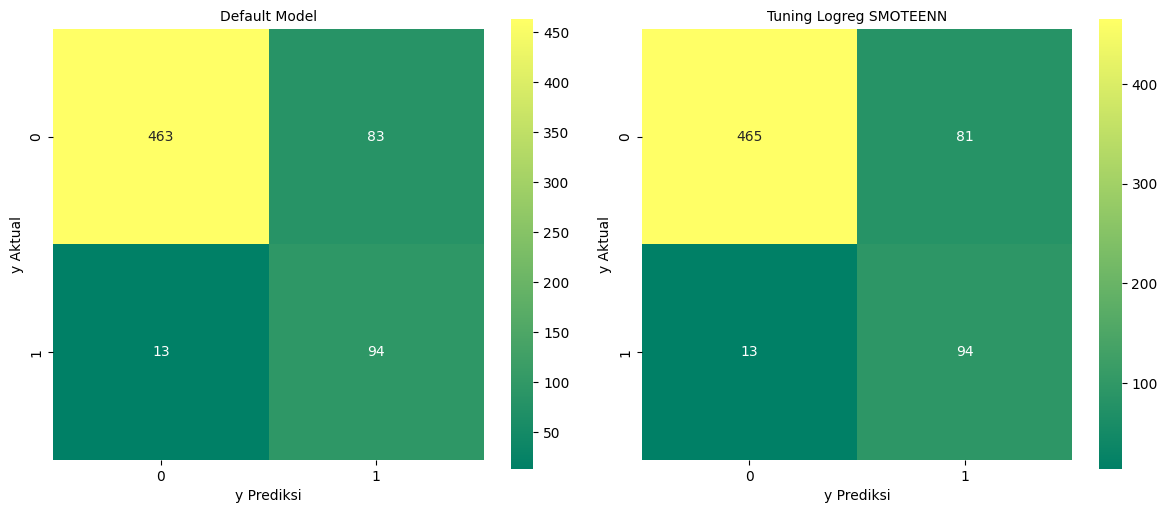

In [104]:
# Confusion Matrix setiap model

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_0), cmap='summer', annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Default Model', size=10)
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_3), cmap='summer', annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'Tuning Logreg SMOTEENN', size=10)

plt.tight_layout()
plt.show()

Pada confusion maetriks diatas kami menititik beratkan pada perhitungan **recall** yang artinya karena kami menganggap bahwa False Positif lebih baik daripada False Negatif. Yang artinya kami lebih memilih mentreatment orang-orang yang diprediksi churn padahal tidak churn. Maka dapat dilihat pada default model, kami akan mentreatment sebanyak 83 orang dan setalah dilakukan tuning berkurang menjadi 81 orang. Hal ini tentu saja dapat mengurangi cost promosi.




## Feature Importance

In [83]:
# Membuat feature importance dari keseluruhan data

koef1 = pd.DataFrame(testing_model_1.named_steps['estimator'].coef_.reshape(-1,1))
koef1['urutan'] = abs(koef1[0])

koef1['column']=testing_model_1.named_steps['transformer '].get_feature_names_out()
koef1 = koef1.sort_values(by='urutan', ascending=False)

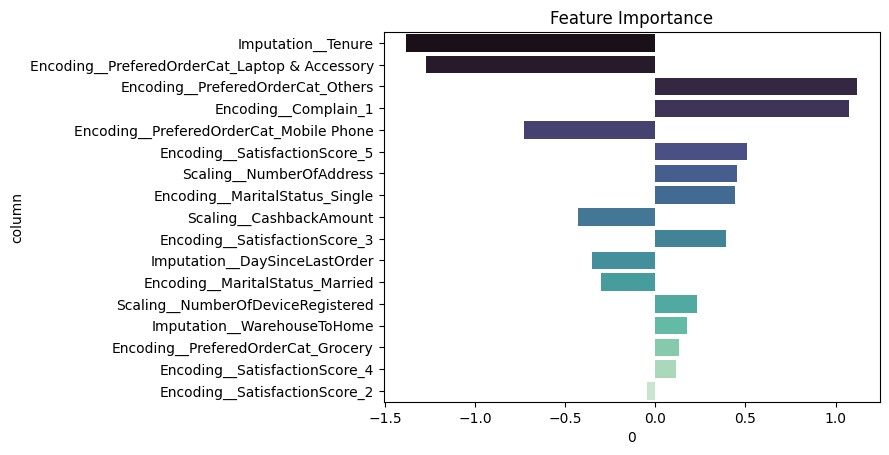

In [106]:
# Membuat plot

sns.barplot(koef1, x=0, y='column', palette='mako')
plt.title('Feature Importance')

plt.show()

*Insight*

- Fakor yang mempengaruhi paling tinggi untuk seseornag melakukan churn adalah `Tenure`, namun faktor ini mempunyai arah yang negatif jadi dapat disimpulkan bahwa semakin pendek jaral waktu seseorang bergabung dalam ecommerce ini maka kemungkinan unutk churn akan semakin tinggi.
- Faktor kedua yang berpengaruh dan mempunyai arah negatif adalah `Prefered Order Cat` terutama pada pembelian **Laptop & Accesory** dan **Mobile Phone**, barang-barang tersebut memang bukan barang kebutuhan sehari-hari jadi sangat wajar jika pembeli hanya butuh membeli sekali kemudian churn.
- `Complain` menjadi faktor selanjutnya yang paling berpengaruh.


In [85]:
X_train_trans = pd.DataFrame(
    testing_model_1.named_steps['transformer ']
    .transform(X_train), columns=testing_model_1
    .named_steps['transformer ']
    .get_feature_names_out()
)

In [86]:
X_test_trans = pd.DataFrame(
    testing_model_1.named_steps['transformer ']
    .transform(X_test), columns=testing_model_1
    .named_steps['transformer ']
    .get_feature_names_out()
)

In [87]:
import lime
from lime import lime_tabular

score = testing_model_1.named_steps['estimator'].score(X_test_trans, y_test)

In [88]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test_trans),
    feature_names=X_test_trans.columns,
    class_names=['Not Churn', 'Churn'],
    mode='classification'
)

In [89]:
classifier = testing_model_1.named_steps['estimator']

In [90]:
# Membuat prediksi probabilitas target

y_proba = testing_model_1.predict_proba(X_test)

In [91]:
y_proba = pd.Series(y_proba[:,1]).reset_index().sort_values(by=0, ascending=False)
y_proba

,index,0
553,553,0.965955
131,131,0.959981
373,373,0.953290
356,356,0.946941
456,456,0.944567
...,...,...
30,30,0.023673
320,320,0.023194
421,421,0.016685
16,16,0.014765


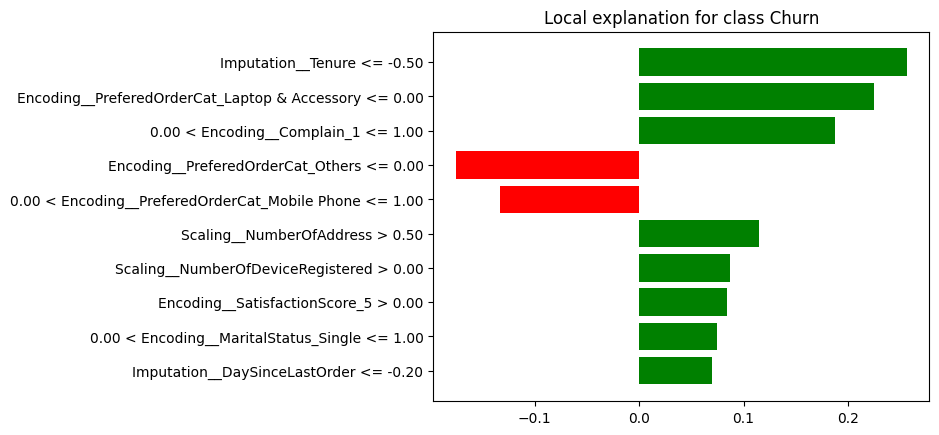

In [92]:
# Membuat feature importance dari index yang probabilitas tidak churnnya tinggi

exp = explainer.explain_instance(X_test_trans.iloc[553],
                                 classifier.predict_proba,
                                 num_features=len(X_test.columns))

exp.as_pyplot_figure()
plt.show()

*Insight*

Jika dilihat pada index 553 atau seseorang yang mempunyai probabilitas tertinggi untuk churn, maka `Tenure` menjadi faktor utama kemudian pembelian kategori **Laptop & Accessory** dan **Others**, lalu index 553 ini juga pernah melakukan komplain.

#**7. Conclusion & Recommendation**

## Conclusion

Tujuan dari project ini adalah untuk mengetahui prediksi seorang customer apakah akan melakukan churn atau tidak dari ecommerce ini. Berdasarkan business problem di atas, diketahui bahwa:

- model dapat mengetahui 74% pelanggan yang tidak churn dan 91% pelanggan yang churn (Berdsarkan Recall)
- Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 41%. Maka masih ada pelanggan yang churn dan diprediksi sebagai tidak churn sebesar 9%.


Type 1 error : False Positive

Konsekuensi: *operation loss* karena mengeluarkan biaya promo untuk pelanggan yang tidak tepat. Biaya yang dikeluarkan sebesar 50 USD per customer per bulan [disini](https://sci-hub.se/https://doi.org/10.1016/j.jretconser.2017.10.007).

Type 2 error : False Negative

Konsekuensi: *profit loss* karena customer churn. biaya yang dikeluarkan 5x lipat dari biaya promo ke customer 250 USD per customer per bulan [disini](https://sci-hub.se/https://doi.org/10.1016/j.jretconser.2017.10.007).

**TANPA MENGGUNAKAN MACHINE LEARNING**

Perusahaan e-commerce tidak dapat mengetahui customer yang akan melakukan churn, sehingga perusahaan e-commerce harus memberikan promosi ke semua customer, agar perusahaan tidak kehilangan customer. Ini menyebabkan perusahaan e-commerce harus mengeluarkan biaya yang besar dalam mengimplentasikan strategi promosinya.

- Pengeluaran perusahaan untuk promosi ke semua customer 50 USD x 653 = 32.650 USD
- Promosi yang tepat sasaran pada orang yang churn: 250 USD X 107 = 26.750 USD

Sehingga diketahui bahwa perusahaan mengeluarkan biaya yang tidak tepat sasaran (biaya promosi untuk customer yang loyal) sebesar: - 32.650 + 26.750 USD = - 5.900 USD. Karena 653 customer adalah 1/5 dari total customer (3.261) maka -5.900 USD x 5 = -29.500 USD. Biaya tersebut seharusnya dapat ditekan jika menggunakan Machine Learning

**DENGAN MENGGUNAKAN MACHINE LEARNING**

Biaya yang tidak tepat sasaran di atas, dapat ditekan jika menggunakan Machine Learning, dengan memprediksi customer yang akan melakukan churn. Sehingga biaya promosi dapat difokuskan kepada customer yang akan melakukan churn, berdasarkan dari hasil prediksi dari Machine Learning.

- Pengeluaran promosi oleh perusahaan yang diprediksi churn (FP+TP): (81+94) x 50 USD = 8.750 USD
- Perusahaan kehilangan customer karena tidak terprediksi akan churn (FN): 13 x 250 USD = 3.250 USD
- Promosi tepat sasaran (TP): 94 x 250 USD = 23.500 USD

Sehingga diketahui bahwa perusahaan e-commerce berhasil menghasilkan Revenue per bulan sebesar: - 8.750 - 3.250 + 23.500 = 11.500 USD. Karena 653 customer adalah 1/5 dari total customer (3.261) maka 11.500 USD x 5 = 57.500 USD

**PERBANDINGAN PENGGUNAAN MACHINE LEARNING**

- Sebelum pakai ML: perusahaan merugi -29.500 USD per bulan
- Setelah menggunakan ML: perusahaan berhasil menghasilkan profit 57.000 USD per bulan

Dapat disimpulkan bahwa Machine Learning dengan menggunakan algoritma Logistic Regression berhasil menghasilkan profit 57.000 per bulan.

**Faktor yang mempengaruhi Customer Churn**

Berdasarkan Feature Importance dan Summary Plot, 3 Faktor utama yang mempengaruhi prediksi Customer Churn secara berurutan adalah

1. ***Tenure***, semakin kecil nilai Tenure artinya semakin baru customer berlangganan semakin besar kemungkinan Customer akan churn dan semakin lama customer berlangganan semakin betah dia terhadap layanan perusahaan.

2. ***Prefered Order Cat***, terutama pada pembelian kategori barang yang memiliki durasi pakai panjang seperti laptop dan ponsel.

2. ***Complain***, semakin besar nilai Complain semakin besar kemungkinan Customer akan Churn dan sebaliknya. nilai yang besar artinya customer melakukan complain atau customer tidak puas terhadap layanan.

## Recommendation

For Business:

Customer yang melakukan churn dapat menimbulkan kerugian bagi perusahaan.

perusahaan e-commerce perlu menyusun strategi agar dapat tetap menjaga kualitas produk dan pelayanan agar dapat menghindari complain yang masuk.
perusahaan e-commerce perlu menyusun strategi agar dapat menciptakan loyalitas pelanggan, baik dengan melakukan inovasi pada produk yang dipasarkan dan memberikan penawaran yang menarik, sehingga tenure customer semakin tinggi.
Perusahaan perlu menggunakan machine learning yang sudah dibuat, agar dapat mengurangi kerugian bagi perusahaan dengan memberikan promosi tepat sasaran kepada customer yang akan melakukan churn.
Untuk prediksi customer selanjutnya dapat menggunakan WebApp yang sudah disediakan, guna memudahkan perusahaan dan dapat mendeteksi sedini mungkin kemungkinan customer churn.

For Model:

Akurasi model machine learning yang dibuat terbatas sehingga diperlukan

- Mengumpulkan lebih banyak data
- Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan seperti lama pengiriman produk, ketepatan waktu pengiriman, dan lain-lain.
- Meminimalisir kesalahan penulisan data dan memastikan data yang diperoleh tidak ada yang kosong atau tidak terisi

Semoga laporan ini dapat membantu perusahaan untuk menprediksi customer yang akan churn sehingga dapat mengurangi profit loss. Terima kasih.